In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sympy import false

In [4]:
df = pd.read_csv("railacc.csv", low_memory = False)
df.head()

,Railroad Code,Railroad Name,Report Year,Incident Number,Incident Year,Incident Month,Other Railroad Code,Other Railroad Name,Other Incident Number,Other Incident Year,...,Other Parent Railroad Code,Other Parent Railroad Name,Other Railroad Holding Company,Maintenance Railroad Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Code,Maintenance Parent Railroad Name,Maintenance Railroad Holding Company,Url
0,UP,Union Pacific Railroad Company,2016,0416FW011,16,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Class 1,SMT-6 - UP/KCS,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,https://safetydata.fra.dot.gov/Officeofsafety/...
1,UP,Union Pacific Railroad Company,2016,0416FW028,16,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Class 1,SMT-6 - UP/KCS,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,https://safetydata.fra.dot.gov/Officeofsafety/...
2,BNSF,BNSF Railway Company,2016,KS0416201,16,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Class 1,SMT-5 - BNSF,BNSF,BNSF Railway Company,BNSF Railway Company,https://safetydata.fra.dot.gov/Officeofsafety/...
3,UP,Union Pacific Railroad Company,2016,0516LK018,16,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Class 1,SMT-6 - UP/KCS,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,https://safetydata.fra.dot.gov/Officeofsafety/...
4,UP,Union Pacific Railroad Company,2016,0416HO019,16,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Class 1,SMT-6 - UP/KCS,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,https://safetydata.fra.dot.gov/Officeofsafety/...


In [7]:
print("columns: ",df.columns.tolist())

columns:  ['Railroad Code', 'Railroad Name', 'Report Year', 'Incident Number', 'Incident Year', 'Incident Month', 'Other Railroad Code', 'Other Railroad Name', 'Other Incident Number', 'Other Incident Year', 'Other Incident Month', 'Maintenance Railroad Code', 'Maintenance Railroad Name', 'Maintainance Incident Number', 'Maintenance Incident Year', 'Maintenance Incident Month', 'Grade Crossing ID', 'Date', 'Month', 'Day', 'Hour', 'Minute', 'AM/PM', 'Time', 'Nearest Station', 'Division', 'Subdivision', 'County Code', 'County Name', 'State Code', 'State Name', 'City Name', 'Highway Name', 'Public/Private Code', 'Public/Private', 'Highway User Code', 'Highway User', 'Estimated Vehicle Speed', 'Vehicle Direction Code', 'Vehicle Direction', 'Highway User Position Code', 'Highway User Position', 'Equipment Involved Code', 'Equipment Involved', 'Railroad Car Unit Position', 'Equipment Struck Code', 'Equipment Struck', 'Hazmat Involvement Code', 'Hazmat Involvement', 'Hazmat Released by Code',

In [10]:
# Converting data and time to datetime

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Hour"] = pd.to_datetime(df["Time"],format="%I:%M %p", errors="coerce").dt.hour


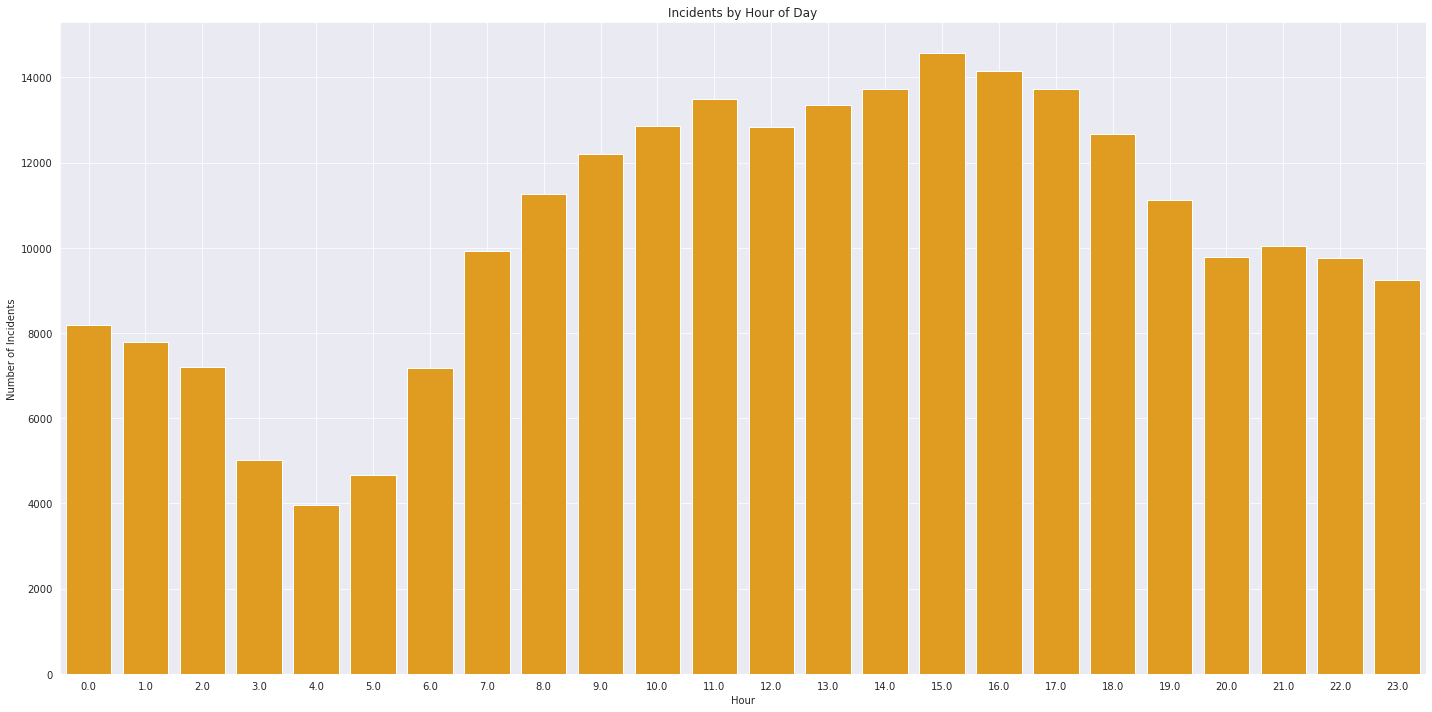

In [13]:
# Time-Based Analysis: Accidents by Hour
plt.figure(figsize=(20, 10))
sns.countplot(x='Hour', data=df, color = "orange")
plt.title('Incidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

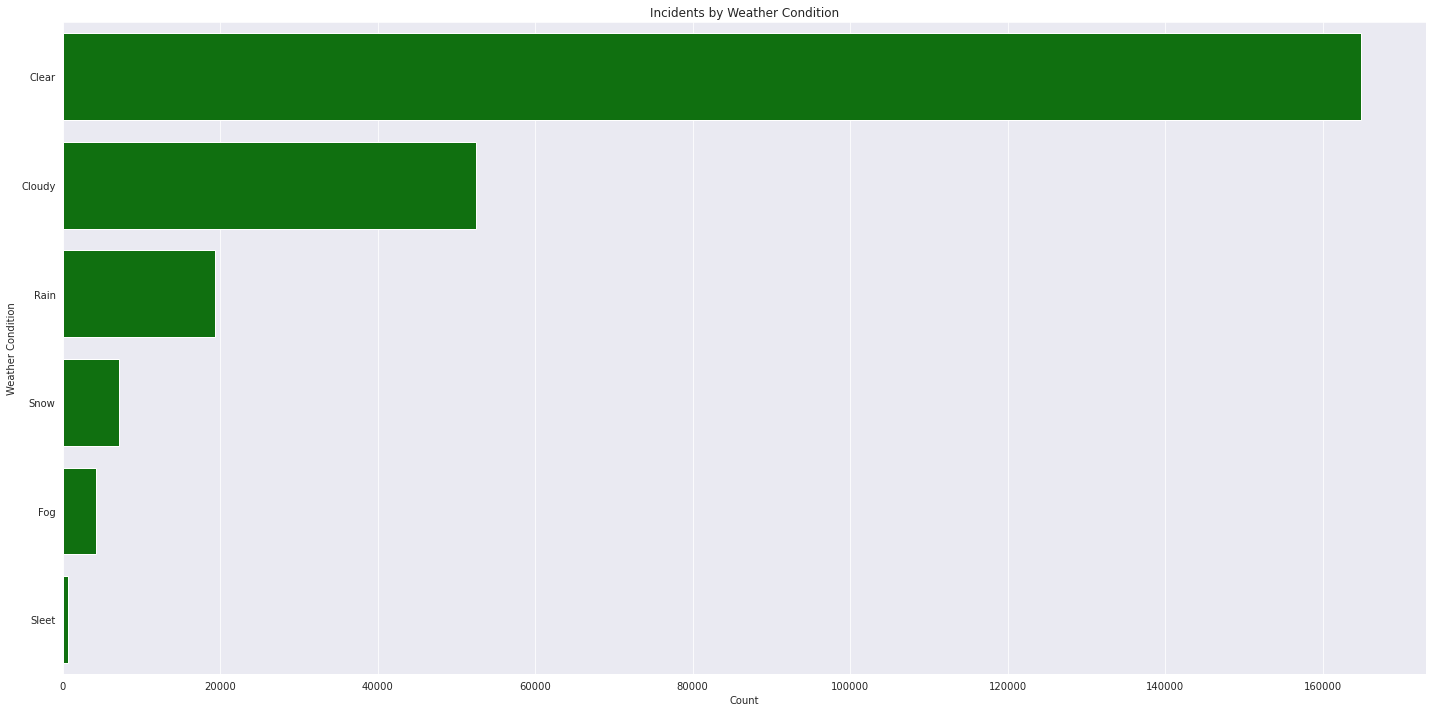

In [17]:
# Analyzing weather conditions

plt.figure(figsize=(20, 10))
sns.countplot(
    y='Weather Condition',
    data=df,
    order=df['Weather Condition'].value_counts().index,
    color = "green"
)
plt.title('Incidents by Weather Condition')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()


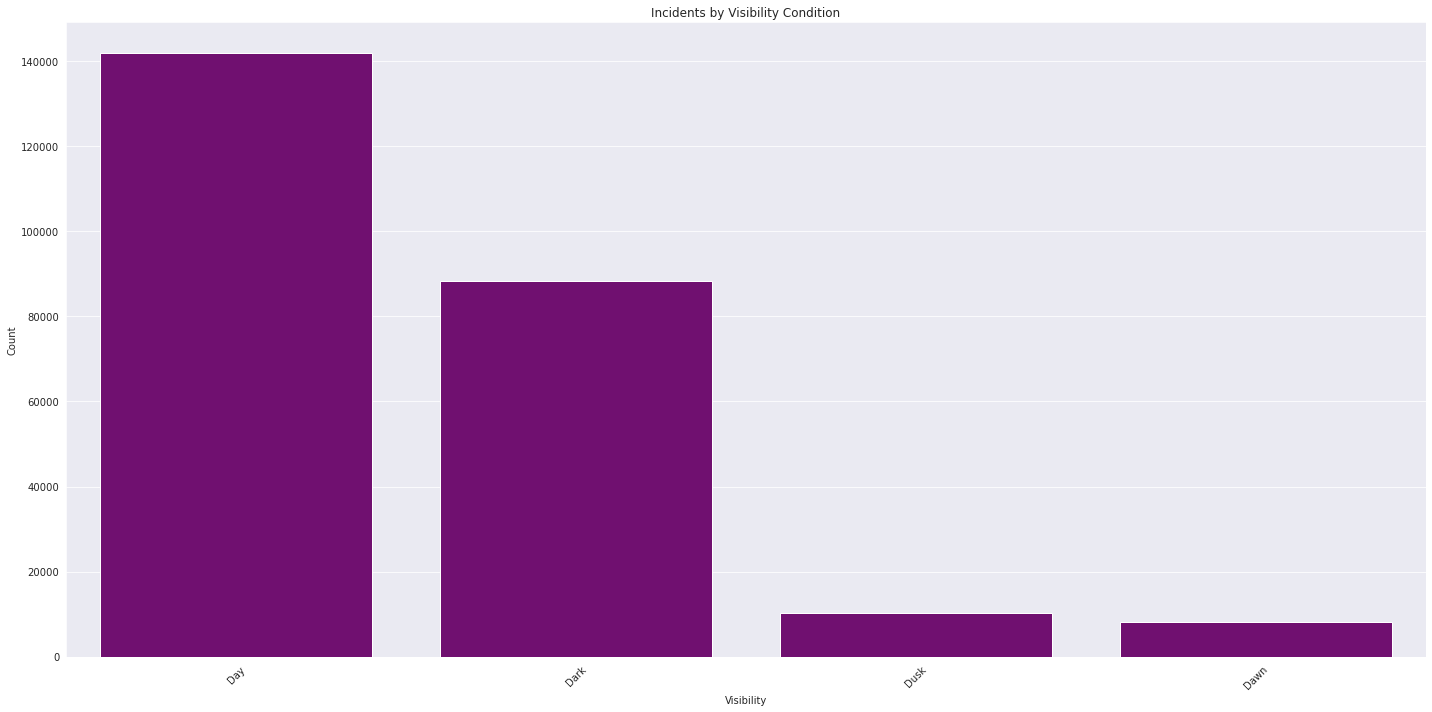

In [21]:
# Analyzing Visibility conditions

plt.figure(figsize=(20, 10))
sns.countplot(
    x='Visibility',
    data=df,
    order=df['Visibility'].value_counts().index,
    color="purple"
)
plt.title('Incidents by Visibility Condition')
plt.xlabel('Visibility')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


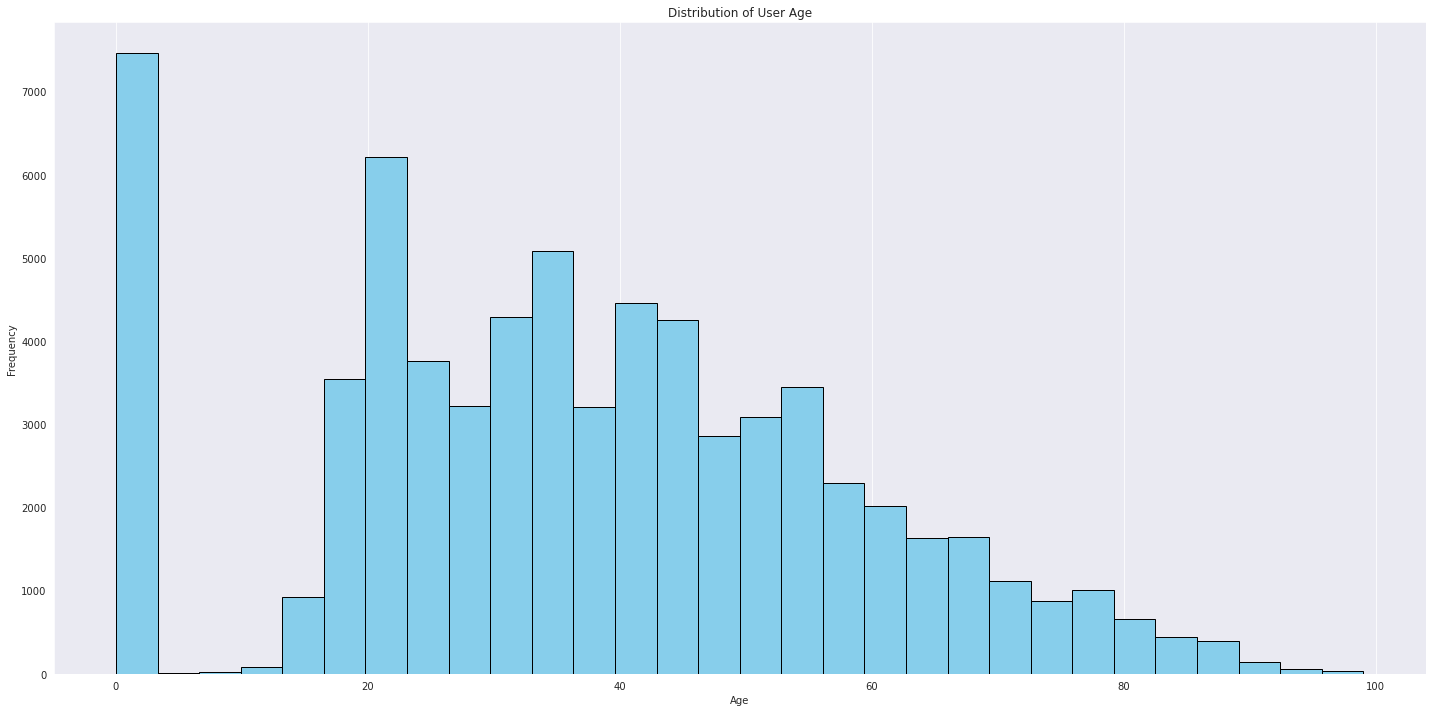

In [23]:
# User Age analysis

plt.figure(figsize=(20, 10))
df['User Age'].dropna().astype(int).plot.hist(
    bins=30,
    color='skyblue',
    edgecolor='black'
)
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

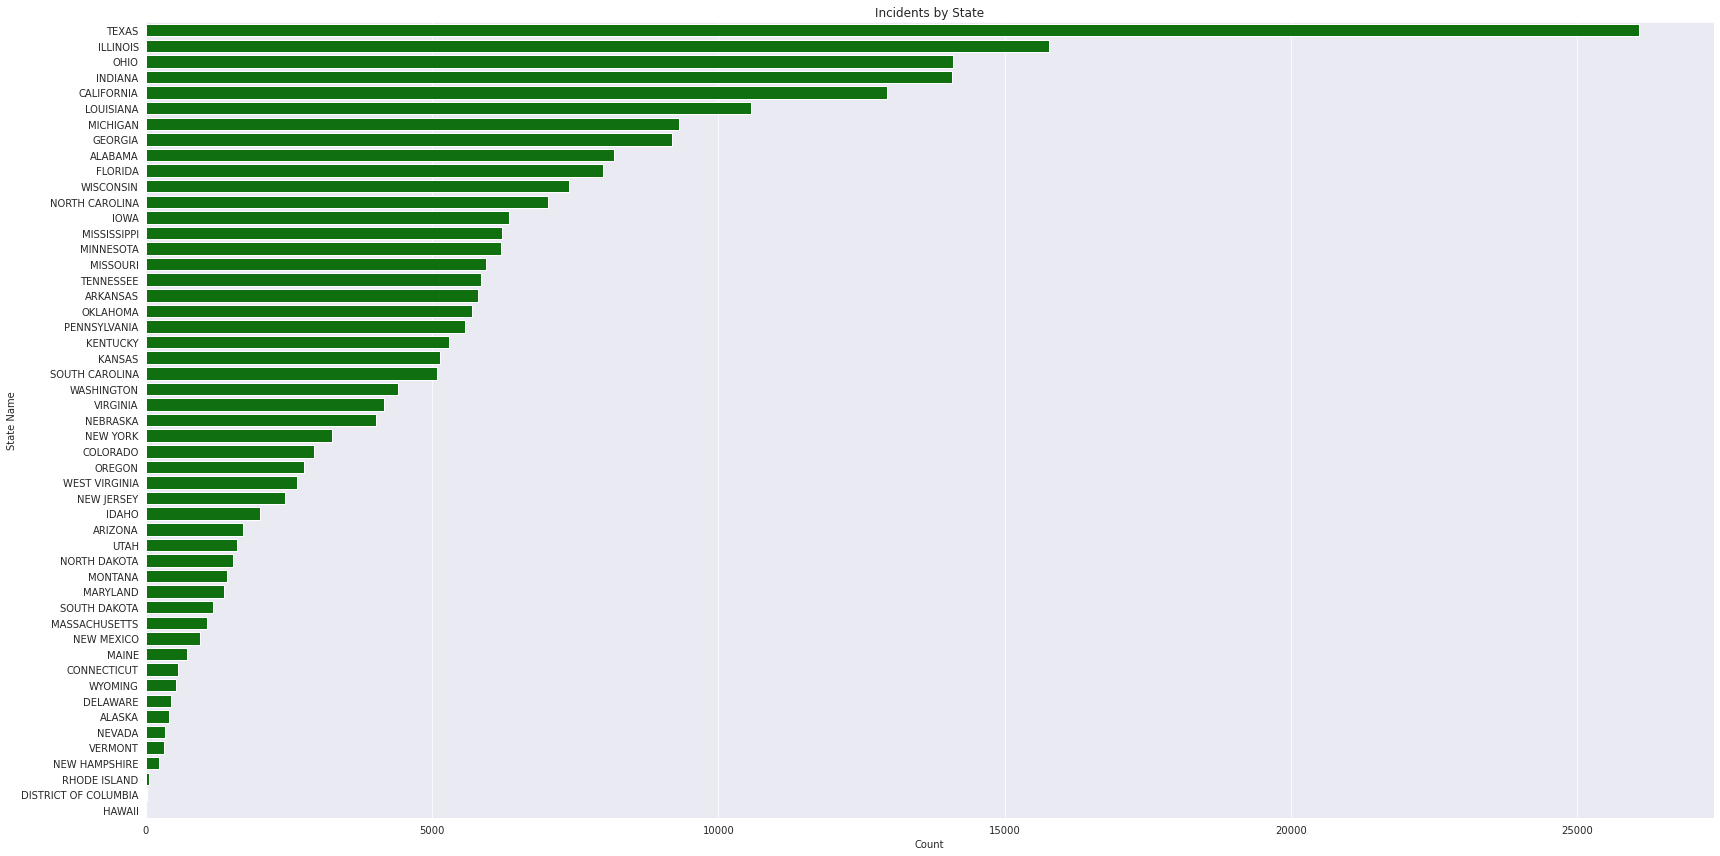

In [25]:
# Analysing State wise accidents

plt.figure(figsize=(24, 12))
sns.countplot(
    y='State Name',
    data=df,
    order=df['State Name'].value_counts().index,
    color = "green"
)
plt.title('Incidents by State')
plt.xlabel('Count')
plt.ylabel('State Name')
plt.tight_layout()
plt.show()


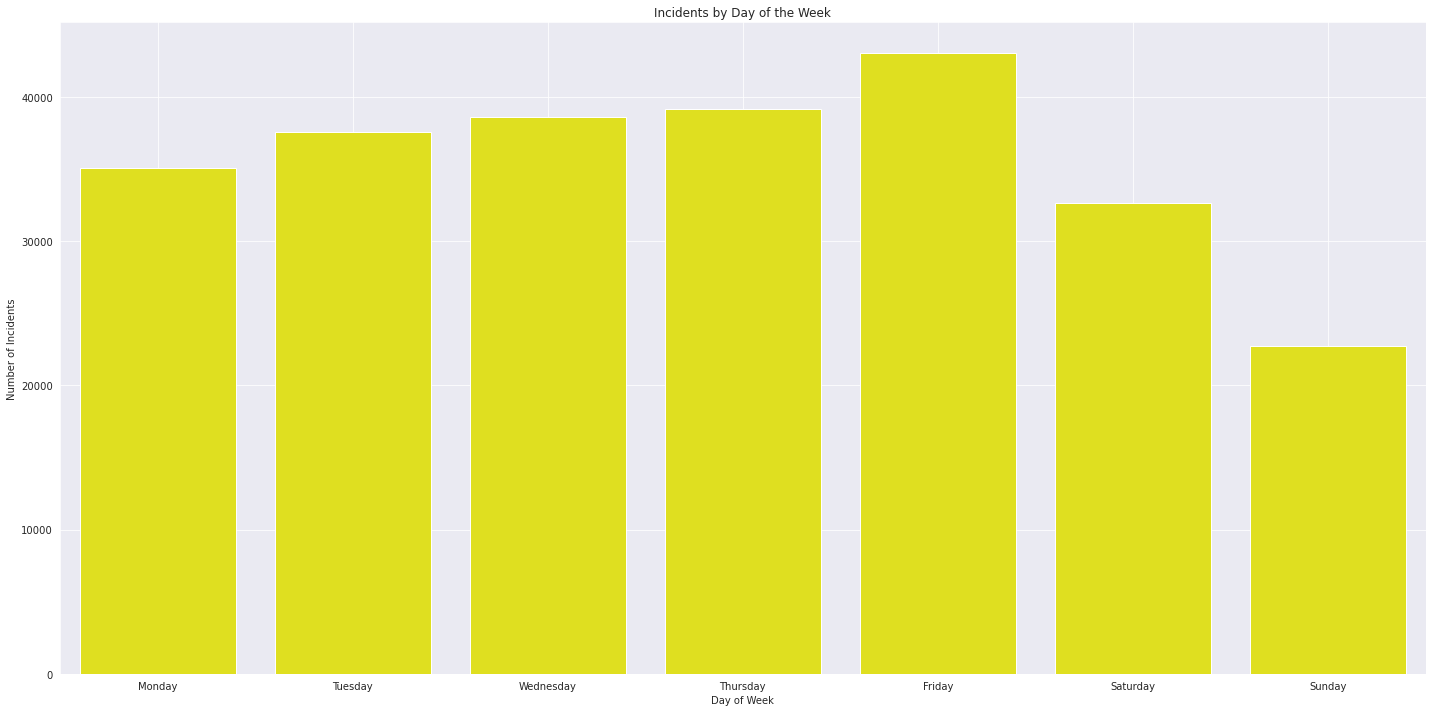

In [28]:
# Analysing by day of week

# Add Day of Week column
df['Day_of_Week'] = df['Date'].dt.day_name()

plt.figure(figsize=(20, 10))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Day_of_Week', data=df, order=order, color = "yellow")
plt.title('Incidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


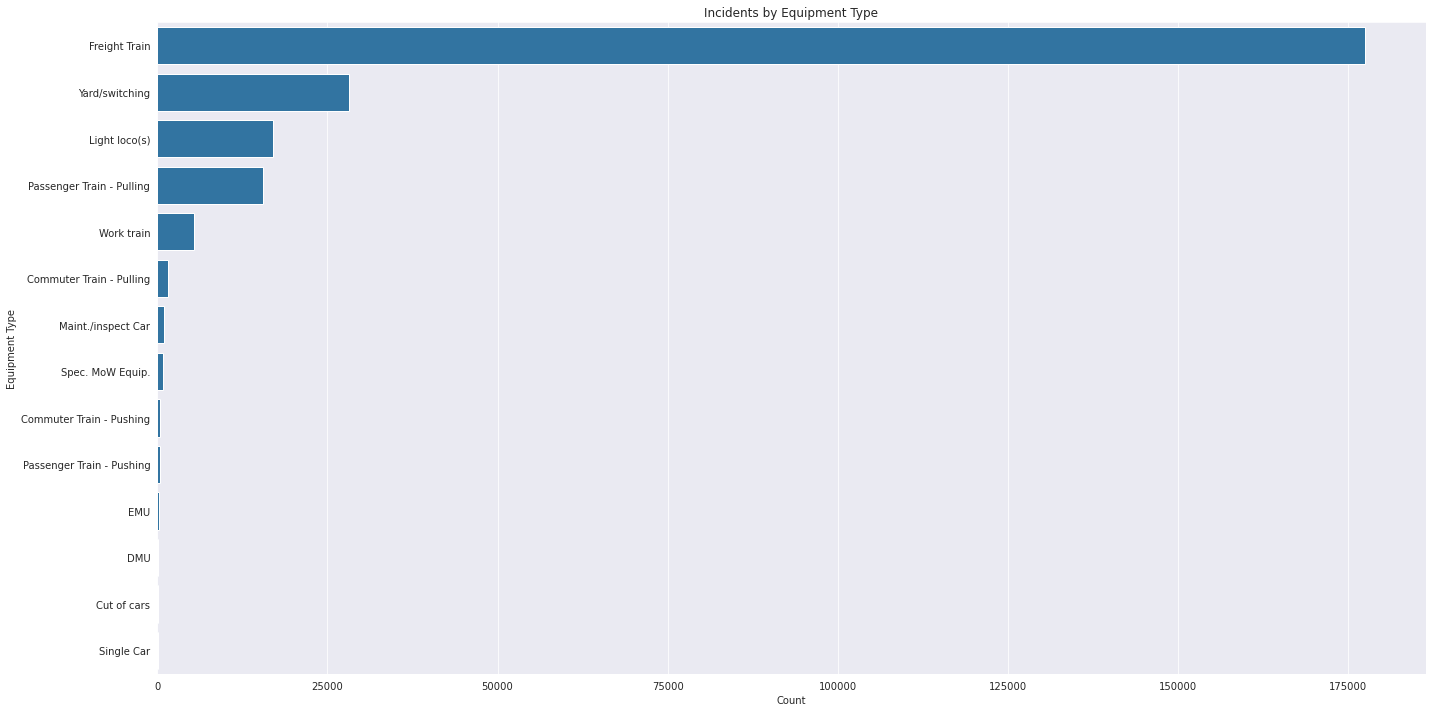

In [29]:
# Analysing by equipment type

plt.figure(figsize=(20, 10))
sns.countplot(
    y='Equipment Type',
    data=df,
    order=df['Equipment Type'].value_counts().index
)
plt.title('Incidents by Equipment Type')
plt.xlabel('Count')
plt.ylabel('Equipment Type')
plt.tight_layout()
plt.show()


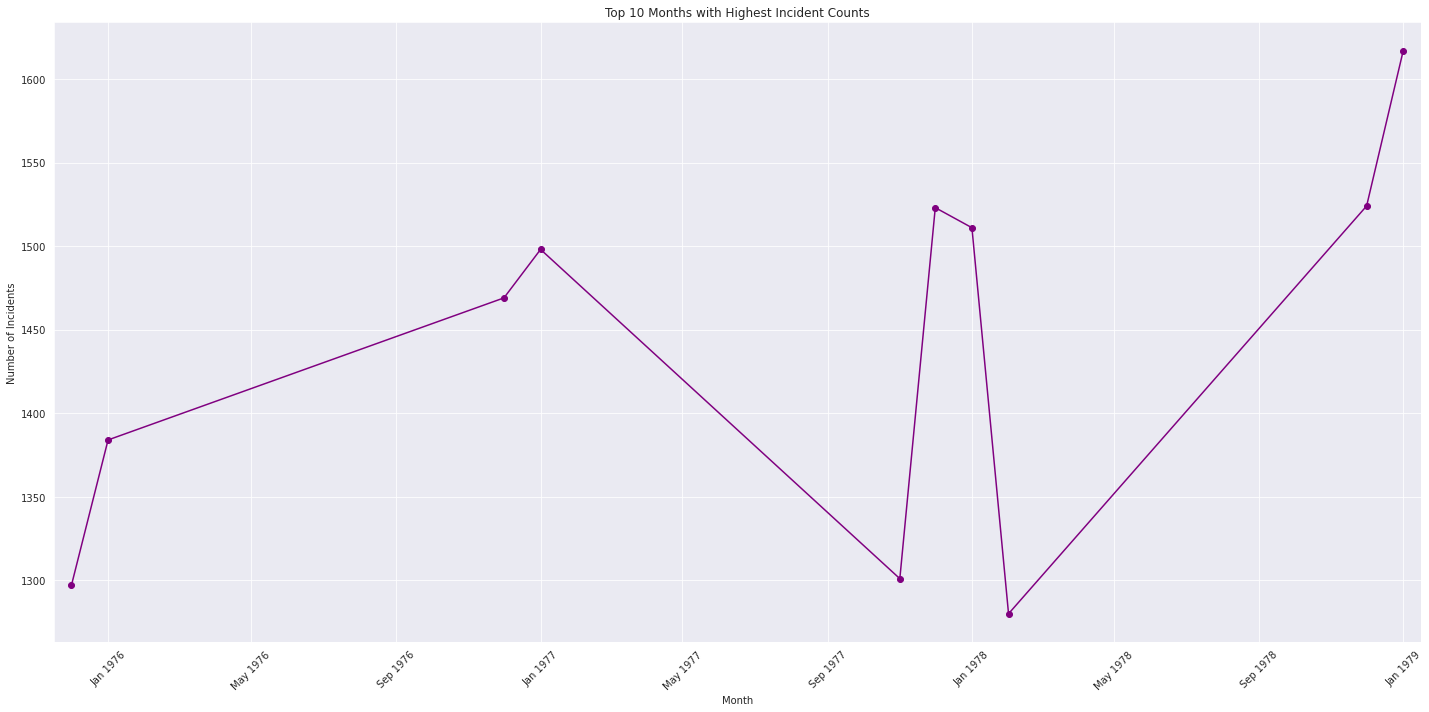

In [38]:
# Useful Insights

#  Create a Year-Month column
df['Year_Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()
# Count incidents per month
monthly_counts = df.groupby('Year_Month').size().reset_index(name='Incidents')
#  Get top 10 months with the highest incidents
top10 = monthly_counts.nlargest(10, 'Incidents').sort_values('Year_Month')
#  Ensure Year_Month is datetime for plotting
top10['Year_Month'] = pd.to_datetime(top10['Year_Month'])

plt.figure(figsize=(20, 10))
plt.plot(
    top10['Year_Month'].to_numpy(),
    top10['Incidents'].to_numpy(),
    marker='o',
    linestyle='-',
    color = 'purple'
)

plt.title('Top 10 Months with Highest Incident Counts')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid(True)

# Format x-axis as "Mon YYYY"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

#  Set limits slightly outside the top10 range
plt.xlim(
    top10['Year_Month'].min() - pd.Timedelta(days=15),
    top10['Year_Month'].max() + pd.Timedelta(days=15)
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

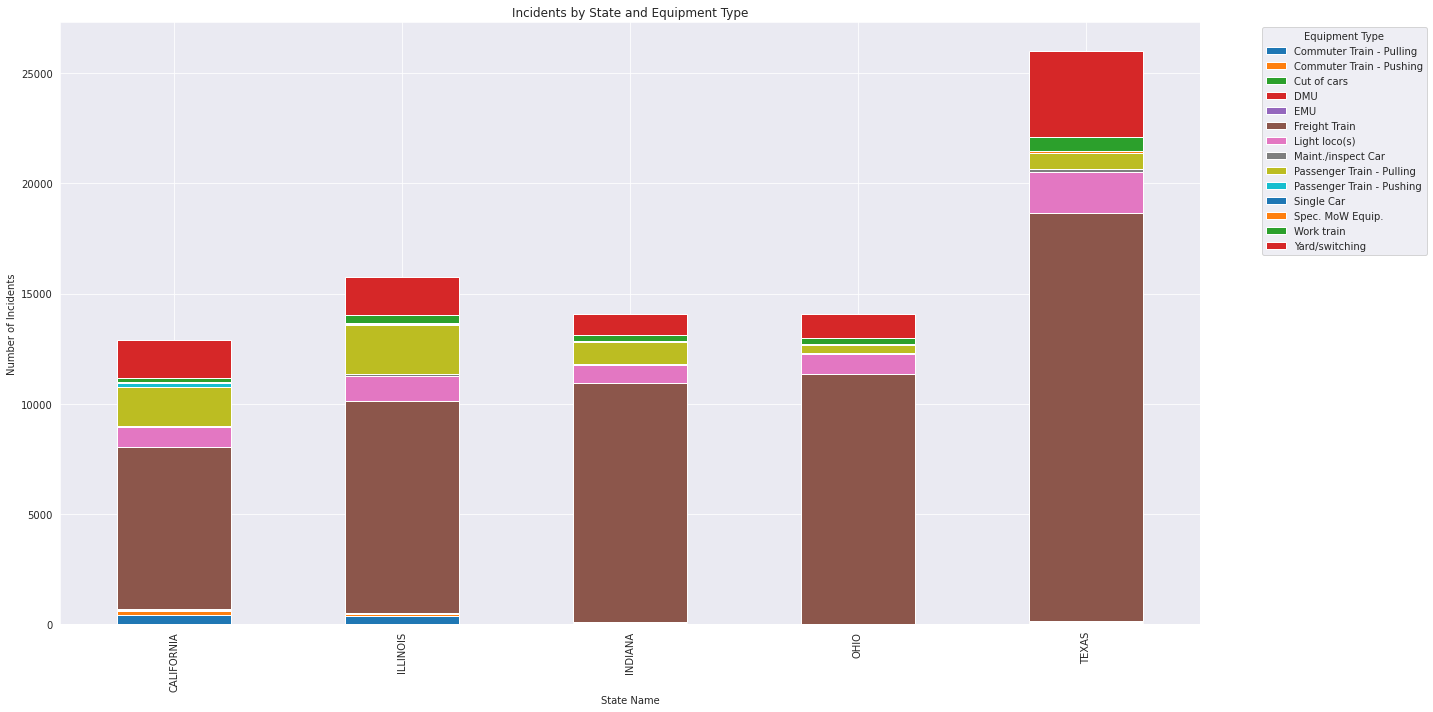

In [40]:
# Select top 5 states by incident count for clarity
top_states = df['State Name'].value_counts().head(5).index
filtered_df = df[df['State Name'].isin(top_states)]

# Pivot table: counts by state and equipment
pivot = filtered_df.pivot_table(index='State Name', columns='Equipment Type', aggfunc='size', fill_value=0)

pivot.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('Incidents by State and Equipment Type')
plt.xlabel('State Name')
plt.ylabel('Number of Incidents')
plt.legend(title='Equipment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Conclusion:


This comprehensive analysis reveals that railway crossing accidents follow predictable patterns related to time, weather, visibility, and geography. The key insight is that accidents are not randomly distributed but concentrate in identifiable hotspots and time periods.
Most Critical Finding: The analysis challenges common assumptions - for example, many accidents occur during clear weather, suggesting that overconfidence rather than poor conditions may be a significant factor.
Actionable Outcomes: The identified patterns provide a clear roadmap for targeted safety interventions, allowing for efficient resource allocation and maximum impact safety improvements.
Future Research Directions: This analysis establishes a foundation for predictive modeling and real-time risk assessment systems that could prevent accidents before they occur.
The data-driven insights from this analysis can significantly contribute to reducing railway crossing accidents through informed decision-making and strategic safety investments.